**Akses API covid.go.id**

Info: Dataset telah diperbarui url-nya pada tanggal 6 Juni 2022, yaitu https://storage.googleapis.com/dqlab-dataset/update.json.

In [42]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [43]:
# cek status code
print(resp)

<Response [200]>


In [44]:
# menampilkan metadata yang tersimpan
print(resp.headers)

{'X-GUploader-UploadID': 'ABPtcPpEbj5UoNDGBSGjnrtfXEEhv_0d0PLuHOmZaJ81pfsWtEIvXwghmSwqnz0h7ZjTpJJ9aNjGr-jVPg', 'Expires': 'Tue, 28 Nov 2023 17:47:52 GMT', 'Date': 'Tue, 28 Nov 2023 16:47:52 GMT', 'Cache-Control': 'public, max-age=3600', 'Last-Modified': 'Mon, 06 Jun 2022 11:12:39 GMT', 'ETag': '"f1a47ff36d3e95f63258d96fe5b2d439"', 'x-goog-generation': '1654513959565478', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '311897', 'Content-Type': 'application/json', 'x-goog-hash': 'crc32c=GMMqEA==, md5=8aR/820+lfYyWNlv5bLUOQ==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '311897', 'Server': 'UploadServer'}


In [45]:
# ekstrak content json ke cov_id_raw dan cov_id_update
cov_id_raw = resp.json()

In [46]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']


Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


**Analisa Data**
1. Kapan tanggal pembaharuan data penambahan kasus?
2. Berapa jumlah penambahan kasus sembuh?
3. Berapa jumlah penambahan kasus meninggal?
4. Berapa jumlah total kasus positif hingga saat ini?
5. Berapa jumlah total kasus meninggal hingga saat ini?

In [47]:
cov_id_raw = resp.json()
cov_id_update = cov_id_raw['update']

print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2022-05-14
Jumlah penambahan kasus sembuh : 416
Jumlah penambahan kasus meninggal : 5
Jumlah total kasus positif hingga saat ini : 6050519
Jumlah total kasus meninggal hingga saat ini: 156453


**Akses API covid Jawa Barat**

In [48]:
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


**Menggunakan keys() pada cov_jabar_raw untuk mengetahui elemen utama yang tersedia dan menjawab pertanyaan berikut:**

1. Berapa jumlah total kasus COVID-19 di Jawa Barat?
2. Berapa persentase kematian akibat COVID-19 di Jawa Barat?
3. Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?


In [49]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat : 1105134
Persentase kematian akibat COVID-19 di Jawa Barat : 1.425619.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.282380.2%


**Ekstrak data historis perkembangan COVID-19 Jawa Barat**

In [50]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

**Data Cleaning**

In [51]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI')
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Sepuyuh data teratas:\n', cov_jabar_tidy.head(10))

Sepuyuh data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0
5 2020-03-08           0          0       0
6 2020-03-09           0          0       0
7 2020-03-10           0          0       0
8 2020-03-11           0          1       0
9 2020-03-12           1          0       0


<Figure size 640x480 with 0 Axes>

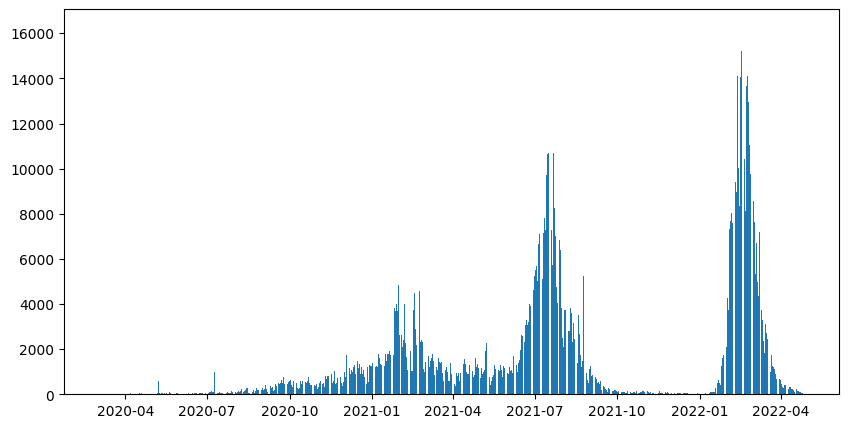

In [52]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height="kasus_baru")
plt.show()

**Visualisasi Data Kasus Positif COVID-19 di Jawa Barat 2020-2022**

<Figure size 640x480 with 0 Axes>

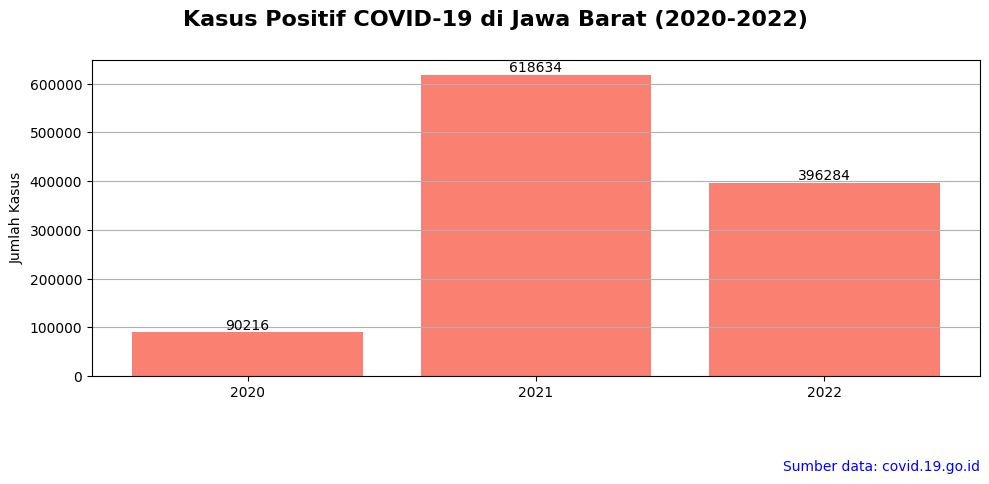

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

# Filter data untuk rentang 2020-2022
start_date = '2020-01-01'
end_date = '2022-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.year)['kasus_baru'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Positif COVID-19 di Jawa Barat (2020-2022)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-54-396443d5d4e8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()


<Figure size 640x480 with 0 Axes>

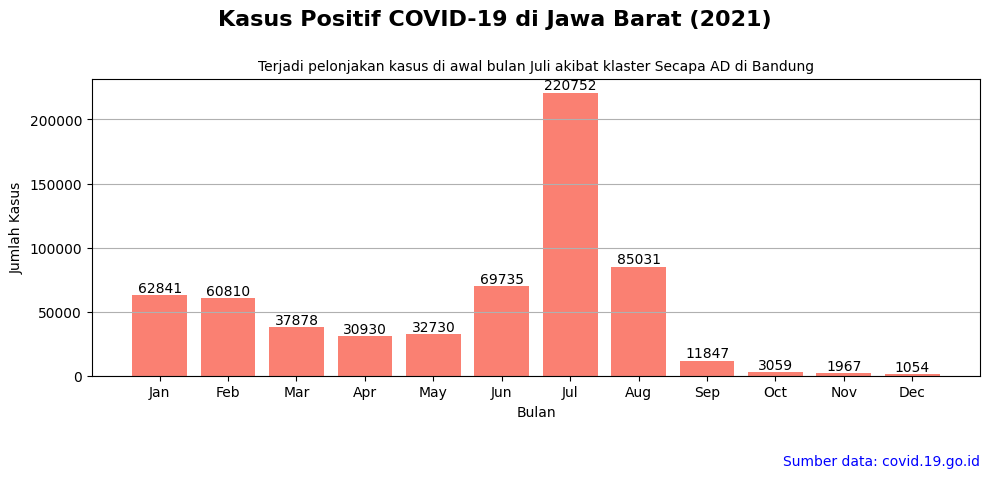

In [54]:
import calendar

# Filter data untuk rentang Januari 2021 sampai Desember 2021
start_date = '2021-01-01'
end_date = '2021-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per bulan
total_kasus_per_bulan = (
    filtered_data.groupby(filtered_data['tanggal'].dt.month)
    .sum()
    .reset_index()
)

# Mengganti nomor bulan dengan nama bulan
total_kasus_per_bulan['tanggal'] = total_kasus_per_bulan['tanggal'].map(lambda x: calendar.month_abbr[x])

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_bulan, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Positif COVID-19 di Jawa Barat (2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD di Bandung',
             fontsize=10, ha='center')
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

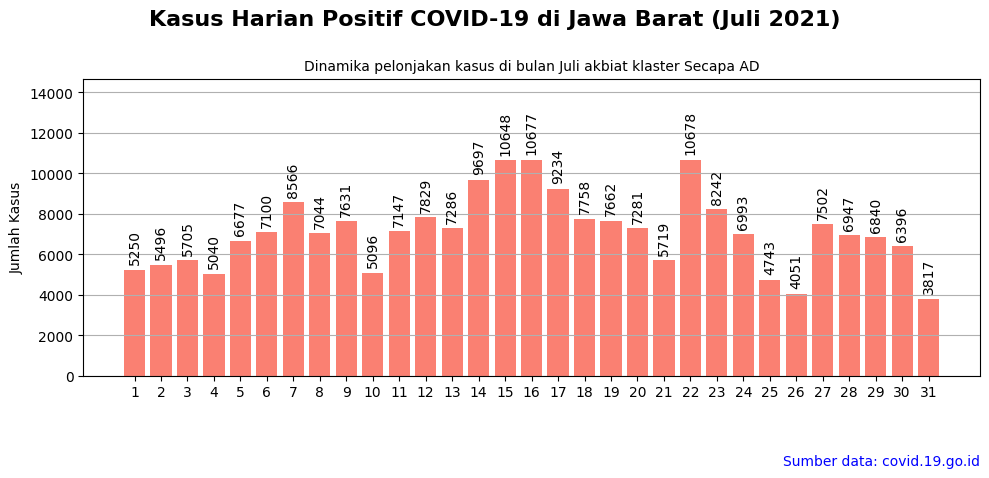

In [55]:
# Filter data untuk rentang bulan Juli 2021
start_date = '2021-07-01'
end_date = '2021-07-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.day)['kasus_baru'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat (Juli 2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Dinamika pelonjakan kasus di bulan Juli akbiat klaster Secapa AD',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Menambahkan nilai per bar
max_y_value = total_kasus_per_tahun['kasus_baru'].max()
ax.set_ylim(0, max_y_value + 4000)  # Menambahkan margin agar tidak terlalu berdekatan dengan batas atas

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 250, round(yval, 2),
            ha='center', va='bottom', rotation=90)


plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Visualisasi Data Kasus Sembuh COVID-19 di Jawa Barat 2020-2022**

<Figure size 640x480 with 0 Axes>

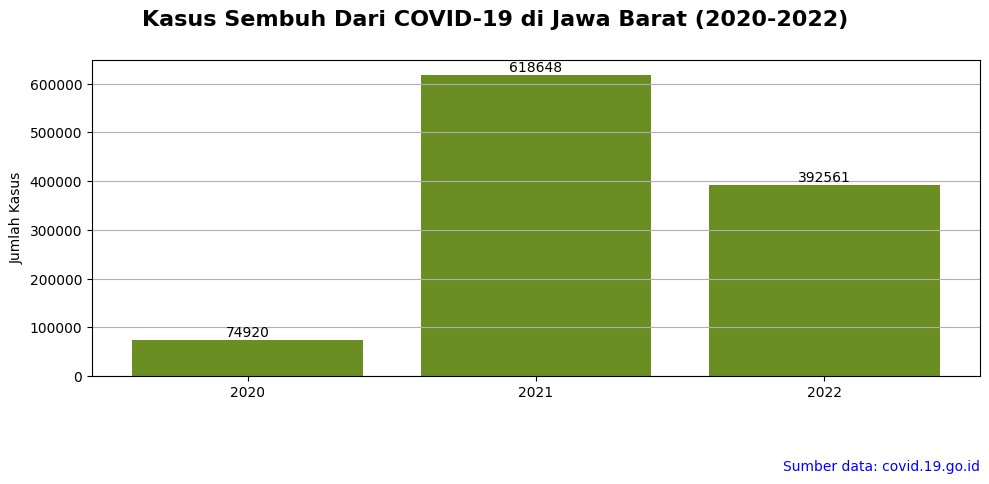

In [56]:
# Filter data untuk rentang 2020-2022
start_date = '2020-01-01'
end_date = '2022-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.year)['sembuh'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='sembuh', color='olivedrab')
fig.suptitle('Kasus Sembuh Dari COVID-19 di Jawa Barat (2020-2022)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-57-78eaa94436ac>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()


<Figure size 640x480 with 0 Axes>

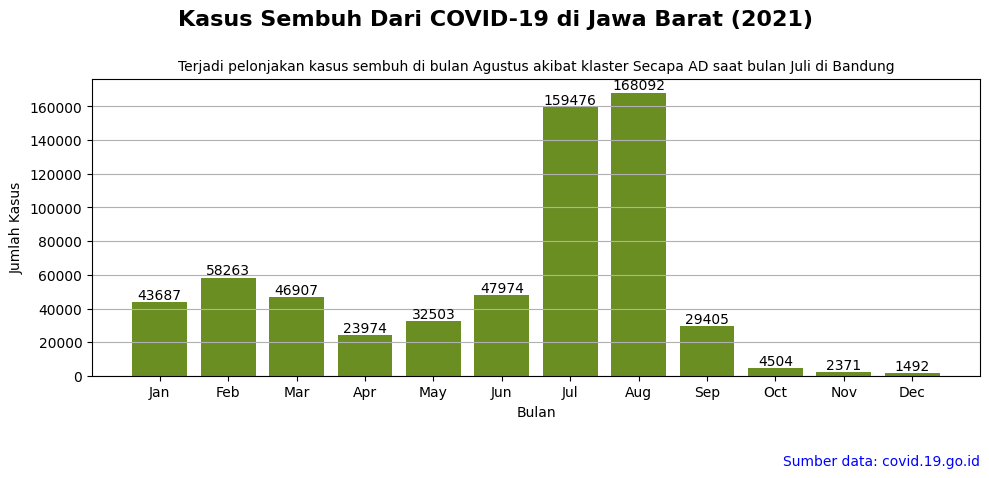

In [57]:
start_date = '2021-01-01'
end_date = '2021-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per bulan
total_kasus_per_bulan = (
    filtered_data.groupby(filtered_data['tanggal'].dt.month)
    .sum()
    .reset_index()
)

# Mengganti nomor bulan dengan nama bulan
total_kasus_per_bulan['tanggal'] = total_kasus_per_bulan['tanggal'].map(lambda x: calendar.month_abbr[x])

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_bulan, x='tanggal', height='sembuh', color='olivedrab')
fig.suptitle('Kasus Sembuh Dari COVID-19 di Jawa Barat (2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus sembuh di bulan Agustus akibat klaster Secapa AD saat bulan Juli di Bandung',
             fontsize=10, ha='center')
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

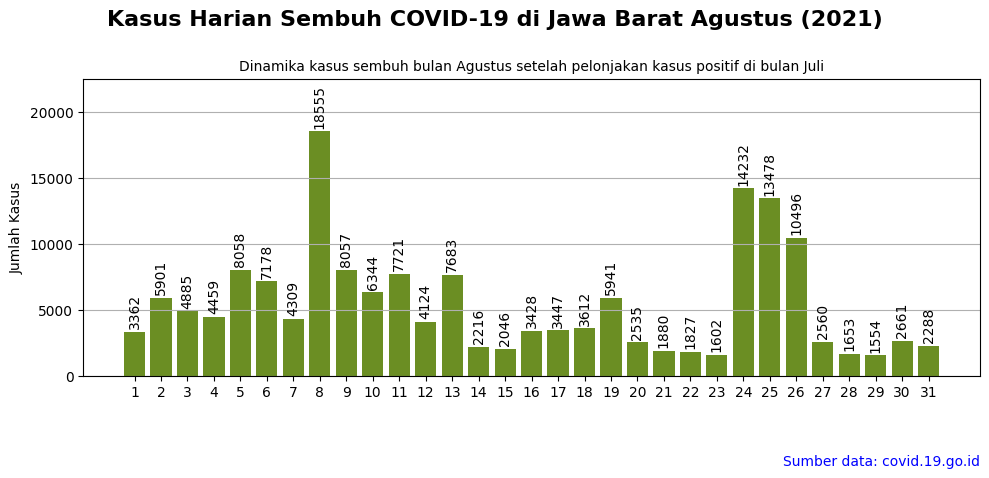

In [58]:
start_date = '2021-08-01'
end_date = '2021-08-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.day)['sembuh'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='sembuh', color='olivedrab')
fig.suptitle('Kasus Harian Sembuh COVID-19 di Jawa Barat Agustus (2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Dinamika kasus sembuh bulan Agustus setelah pelonjakan kasus positif di bulan Juli',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


# Menambahkan nilai per bar
max_y_value = total_kasus_per_tahun['sembuh'].max()
ax.set_ylim(0, max_y_value + 4000)  # Menambahkan margin agar tidak terlalu berdekatan dengan batas atas

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 250, round(yval, 2),
            ha='center', va='bottom', rotation=90)


plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Visualisasi Data Kasus Meninggal Akibat COVID-19 di Jawa Barat 2020-2022**

<Figure size 640x480 with 0 Axes>

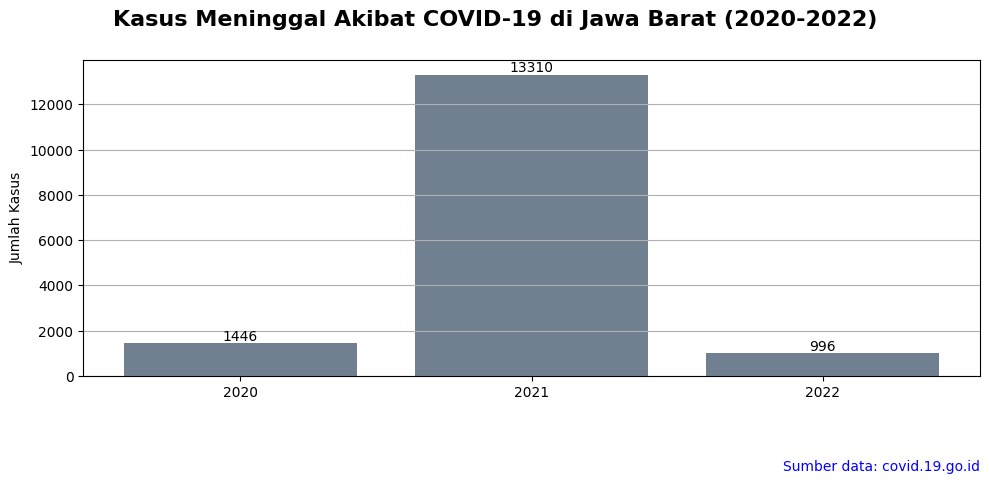

In [59]:
start_date = '2020-01-01'
end_date = '2022-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.year)['meninggal'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle('Kasus Meninggal Akibat COVID-19 di Jawa Barat (2020-2022)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-60-8d1c7c56ac75>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()


<Figure size 640x480 with 0 Axes>

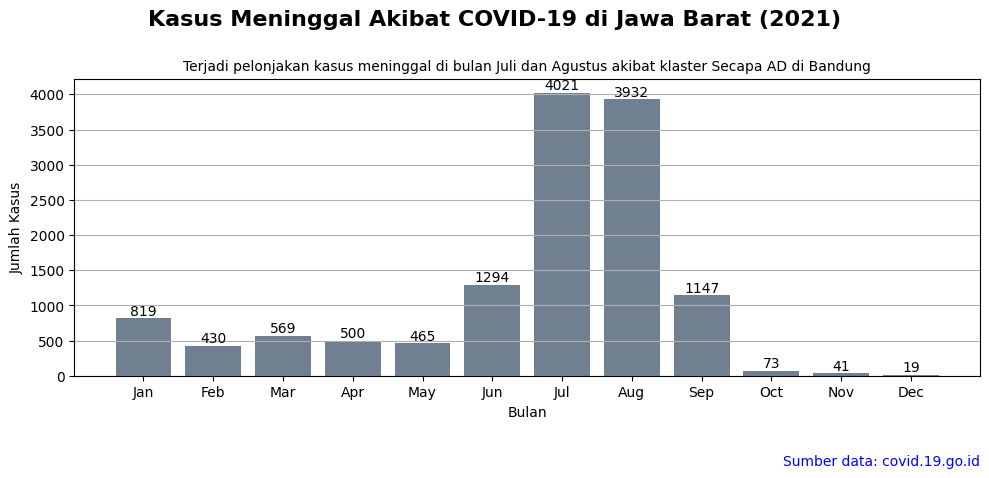

In [60]:
start_date = '2021-01-01'
end_date = '2021-12-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per bulan
total_kasus_per_bulan = (
    filtered_data.groupby(filtered_data['tanggal'].dt.month)
    .sum()
    .reset_index()
)

# Mengganti nomor bulan dengan nama bulan
total_kasus_per_bulan['tanggal'] = total_kasus_per_bulan['tanggal'].map(lambda x: calendar.month_abbr[x])

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_bulan, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle('Kasus Meninggal Akibat COVID-19 di Jawa Barat (2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus meninggal di bulan Juli dan Agustus akibat klaster Secapa AD di Bandung',
             fontsize=10, ha='center')
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menambahkan nilai per bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

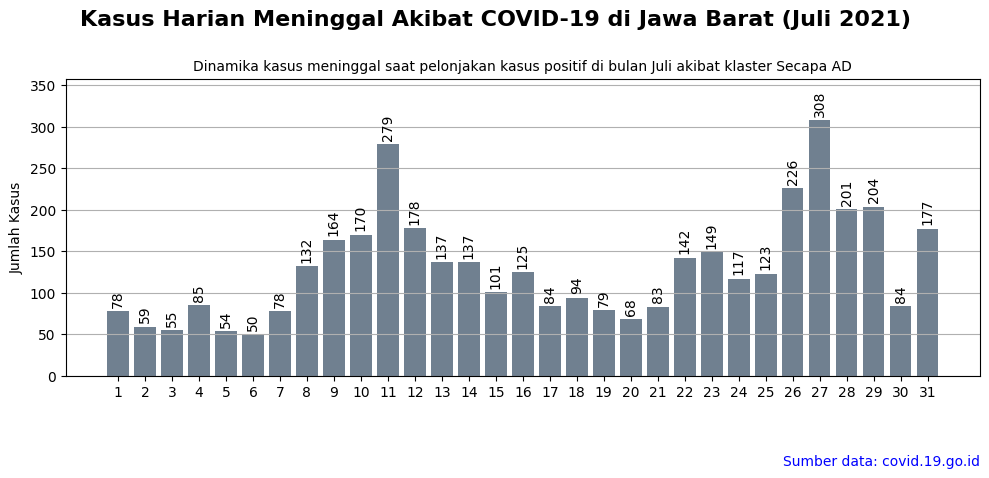

In [61]:
start_date = '2021-07-01'
end_date = '2021-07-31'
filtered_data = cov_jabar_tidy[(cov_jabar_tidy['tanggal'] >= start_date) & (cov_jabar_tidy['tanggal'] <= end_date)]

# Menghitung total kasus baru per tahun
total_kasus_per_tahun = filtered_data.groupby(filtered_data['tanggal'].dt.day)['meninggal'].sum().reset_index()

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(data=total_kasus_per_tahun, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle('Kasus Harian Meninggal Akibat COVID-19 di Jawa Barat (Juli 2021)',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Dinamika kasus meninggal saat pelonjakan kasus positif di bulan Juli akibat klaster Secapa AD',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

# Menyesuaikan posisi label pada sumbu x sesuai dengan jumlah batang
ax.set_xticks(total_kasus_per_tahun['tanggal'])

# Mengatur formatter untuk sumbu x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Menambahkan nilai per bar
max_y_value = total_kasus_per_tahun['meninggal'].max()
ax.set_ylim(0, max_y_value + 50)  # Menambahkan margin agar tidak terlalu berdekatan dengan batas atas

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2),
            ha='center', va='bottom', rotation=90)


plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Menjawab pertanyaan: "Apakah setiap pekannya lebih baik dari pekan sebelumnya?"**

Untuk menjawab pertanyaan tersebut, saya melakukan kalkulasi dengan tahapan berikut:


*   Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini saya beri nama jumlah_pekanlalu
*   Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0 atau False
*   Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu.
*   Hasil komparasi saya simpan dalam kolom baru dengan nama lebih_baik yang berisi nilai 1 atau True apabila jumlah kasus baru pekan berikutnya lebih rendah daripada jumlah kasus pekan lalu





In [62]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


<Figure size 640x480 with 0 Axes>

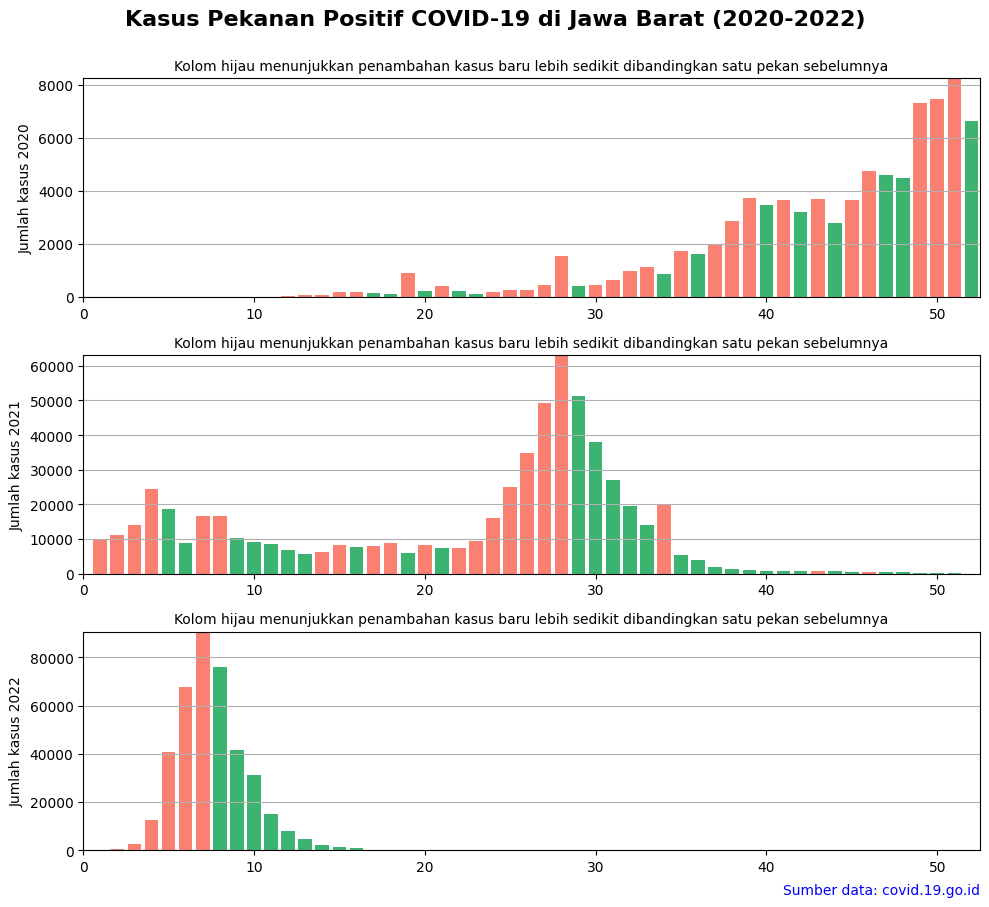

In [63]:
years = cov_jabar_pekanan['tahun'].unique()

plt.clf()
jml_tahun_terjadi_covid19 = len(years)
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, figsize=(10, 3 * jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat ({}-{})'.format(years.min(), years.max()),
             y=1.00, fontsize=16, fontweight='bold', ha='center')

for i, ax in enumerate(axes):
    cov_data = cov_jabar_pekanan[cov_jabar_pekanan['tahun'] == years[i]]

    ax.bar(data=cov_data,
           x='pekan_ke', height='jumlah',
           color=['mediumseagreen' if x is True else 'salmon'
                  for x in cov_data['lebih_baik']])

    if i == jml_tahun_terjadi_covid19 - 1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
                ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_data['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d' % (years[i],))
    ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                 fontsize=10)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()


**Pola dan Dinamika**

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus terus terjadi di masyarakat. Hal tersebut memicu pertanyaan "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi

---
Jumlah kasus aktif dapat dihitung dengan mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal menggunakan cumsum() untuk menghitung nilai dari vektor numerik


In [64]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


<Figure size 640x480 with 0 Axes>

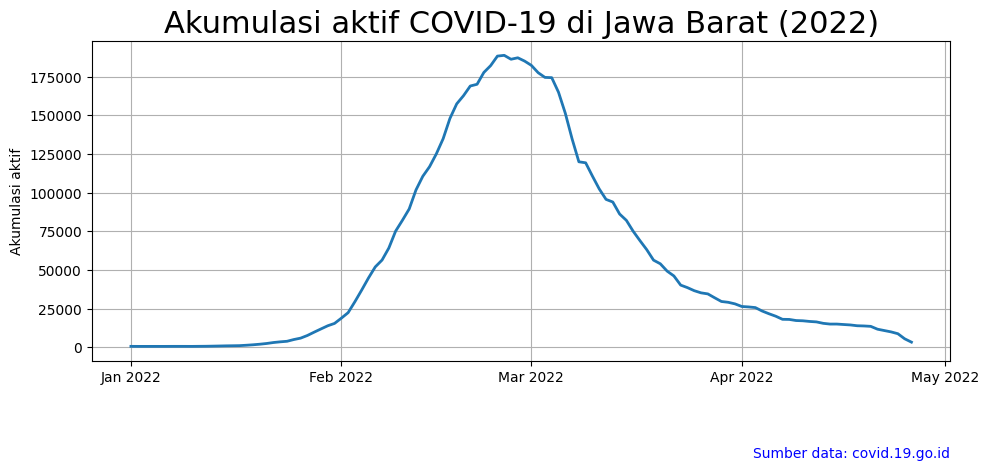

In [65]:
# Filter data untuk tahun 2022
cov_jabar_akumulasi_2022 = cov_jabar_akumulasi[cov_jabar_akumulasi['tanggal'].dt.year == 2022]

plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi_2022, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat (2022)',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticks(cov_jabar_akumulasi_2022['tanggal'].unique())  # Mengatur tick pada sumbu x

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


<Figure size 640x480 with 0 Axes>

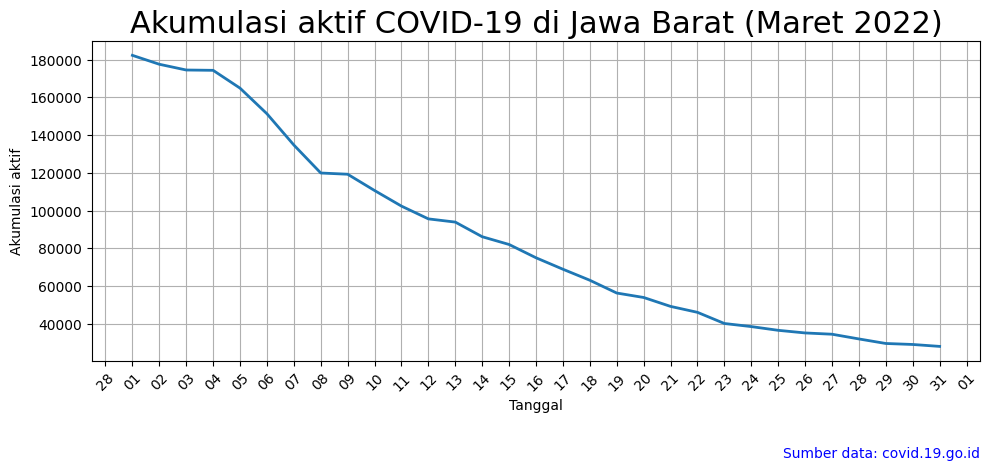

In [66]:
# Filter data untuk bulan Maret 2022
cov_jabar_akumulasi_march_2022 = cov_jabar_akumulasi[
    (cov_jabar_akumulasi['tanggal'].dt.year == 2022) &
    (cov_jabar_akumulasi['tanggal'].dt.month == 3)
]

plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi_march_2022, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat (Maret 2022)',
             fontsize=22)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**Visualisasi Data Komparasi Akumulasi**

Membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal

<Figure size 640x480 with 0 Axes>

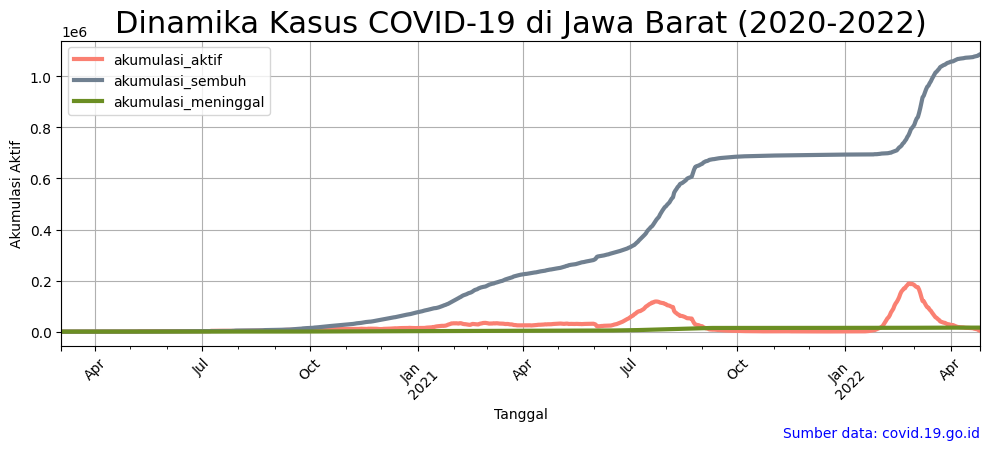

In [67]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')

# Filter data untuk rentang waktu 2020-2022
cov_jabar_akumulasi_ts = cov_jabar_akumulasi_ts['2020-01-01':'2022-12-31']

cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat (2020-2022)', fontsize=22)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

# Mengatur batasan sumbu x pada rentang waktu 2020-2022
ax.set_xlim(cov_jabar_akumulasi_ts.index.min(), cov_jabar_akumulasi_ts.index.max())

plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


<Figure size 640x480 with 0 Axes>

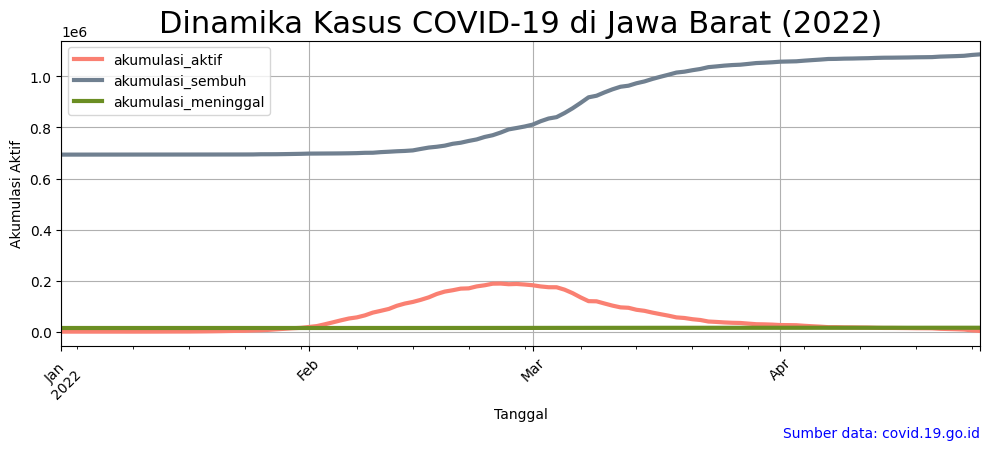

In [68]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')

# Filter data untuk rentang waktu 2020-2022
cov_jabar_akumulasi_ts = cov_jabar_akumulasi_ts['2022-01-01':'2022-12-31']

cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat (2022)', fontsize=22)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

# Mengatur batasan sumbu x pada rentang waktu 2020-2022
ax.set_xlim(cov_jabar_akumulasi_ts.index.min(), cov_jabar_akumulasi_ts.index.max())

plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


<Figure size 640x480 with 0 Axes>

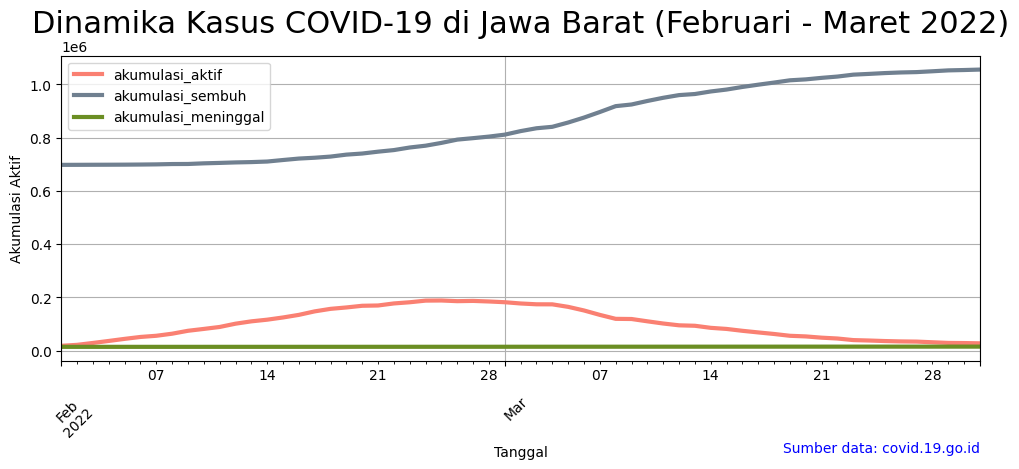

In [69]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')

# Filter data untuk rentang waktu 2020-2022
cov_jabar_akumulasi_ts = cov_jabar_akumulasi_ts['2022-02-01':'2022-03-31']

cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat (Februari - Maret 2022)', fontsize=22)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

# Mengatur batasan sumbu x pada rentang waktu 2020-2022
ax.set_xlim(cov_jabar_akumulasi_ts.index.min(), cov_jabar_akumulasi_ts.index.max())

plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
